<a href="https://colab.research.google.com/github/mihika073/Deeplearning/blob/main/Mihika_Assignment3_FFNNs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M2.3 Individual NN Classification Assignment (Fall '22)
**Dr. Dave Wanik - University of Connecticut**

* Full Name: Mihika Srivastava
* Student ID (7 digit number): 3003306

---------------------------------------------------------------------------

Each student must complete and submit their own file, but you may work with your group for help. I do not want to see direct copy and pasted code otherwise you will get a zero.

1. Read the data dictionary and description from here: 

* https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40resultsdatadictionaryf2021.zip

 Download the data using gdown, read the Excel file using pandas, print the first 10 rows using df.head() and use df.info() to examine the data types and missing values.

2. Simplify the raw dataframe so that you only keep the columns you need. The `X` variable will be the following columns: `Population`, `Ozone` through `Solid Waste Pctl`, and `Asthma` through `Linguistic Isolation Pctl`. The `y` variable will be `Poverty`. Examine the quality of each column and use your judgement about dropping rows or imputing missing values. Add text cells and lots of comments so we can understand your logic/justification!

3. Recode the target variable to a 1 if greater than the median value of poverty, otherwise make it a 0. Use this recoded variable as the target variable! Now it is a classification problem.

4. Make two interesting plots or tables and a description of why you made the table and what you see.

5. Do an 90/10 split for X_train, X_test, y_train, y_test where the random seed is equal to your 7 digit studentID number.

6. Use the StandardScaler() on train and apply to test partition. Do not scale the target variable!

7. Build a model using the Sequential API (like we do in class) with at least 2 dense layers with the relu activation function, and with dropout in between each dense layer (use a number between 0.1 and 0.5). Compile the model using an appropriate optimizer. Use early stopping with patience of at least 10 and restore the best weights once the model converges. You can choose whatever batch size you would like to.

8. Fit the model for 100000 epochs with a batch size of your choice, using X_test and y_test as the validation data. Don’t forget the early stopping callback! 

9. Evaluate the model using learning curves, error metrics and confusion matrices for each partition (like we do in class). You should largely be able to copy and paste this from class notebooks. Add a few bullet points about what you see (did your model learn nice and gently? What do the scatterplots look like?). If you don't have text cells here, you will lose points.

10. Calculate what a baseline prediction would be for the train and test partitions (a mean only model). Did your model do better than the baseline predictions? If so, you have a useful model! 

# Read Data and Import Modules

In [ ]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for data prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# https://drive.google.com/file/d/1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E/view?usp=sharing
!gdown --id 1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E # ID for Environmental Health data! look up!
df_CalEnviroScreen = pd.read_excel('CalEnviroScreen.xlsx')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E
To: /content/CalEnviroScreen.xlsx
100% 6.19M/6.19M [00:00<00:00, 108MB/s]


In [ ]:
# read data
df = pd.read_excel('CalEnviroScreen.xlsx')

In [ ]:
df.head(5)

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752


In [ ]:
df.columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Nearby City \n(to help approximate location only)', 'Longitude',
       'Latitude', 'CES 3.0 Score', ' CES 3.0 Percentile',
       'CES 3.0 \nPercentile Range', 'SB 535 Disadvantaged Community', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

We can see this dataframe has some columns with missing values so we need to take care of it. But before that we will create a new dataframe which we will use for modelling and then take care of all the missing values

##Data frame for modeling

In [ ]:
dfM = df[['Total Population','Ozone','Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl','Drinking Water', 'Drinking Water Pctl', 'Pesticides','Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl','Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl','Poverty']]
dfM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Population             8035 non-null   int64  
 1   Ozone                        8035 non-null   float64
 2   Ozone Pctl                   8035 non-null   float64
 3   PM2.5                        8016 non-null   float64
 4   PM2.5 Pctl                   8016 non-null   float64
 5   Diesel PM                    8035 non-null   float64
 6   Diesel PM Pctl               8035 non-null   float64
 7   Drinking Water               8017 non-null   float64
 8   Drinking Water Pctl          8017 non-null   float64
 9   Pesticides                   8035 non-null   float64
 10  Pesticides Pctl              8035 non-null   float64
 11  Tox. Release                 8035 non-null   float64
 12  Tox. Release Pctl            8035 non-null   float64
 13  Traffic           

In [ ]:
dfM.shape

(8035, 36)

Lets count the number of null values for each column

In [ ]:
print("Total Nulls in each column are as follows: ")
dfM.isna().sum()

Total Nulls in each column are as follows: 


Total Population                 0
Ozone                            0
Ozone Pctl                       0
PM2.5                           19
PM2.5 Pctl                      19
Diesel PM                        0
Diesel PM Pctl                   0
Drinking Water                  18
Drinking Water Pctl             18
Pesticides                       0
Pesticides Pctl                  0
Tox. Release                     0
Tox. Release Pctl                0
Traffic                         56
Traffic Pctl                    56
Cleanup Sites                    0
Cleanup Sites Pctl               0
Groundwater Threats              0
Groundwater Threats Pctl         0
Haz. Waste                       0
Haz. Waste Pctl                  0
Imp. Water Bodies                0
Imp. Water Bodies Pctl           0
Solid Waste                      0
Solid Waste Pctl                 0
Asthma                           0
Asthma Pctl                      0
Low Birth Weight               222
Low Birth Weight Pct

We can there are around 13 columns with null values, so we might need to drop rows, drop columns or perform imputation. We will perform correlation among columns to check that.

In [ ]:
dfM.isna().sum()

Total Population                 0
Ozone                            0
Ozone Pctl                       0
PM2.5                           19
PM2.5 Pctl                      19
Diesel PM                        0
Diesel PM Pctl                   0
Drinking Water                  18
Drinking Water Pctl             18
Pesticides                       0
Pesticides Pctl                  0
Tox. Release                     0
Tox. Release Pctl                0
Traffic                         56
Traffic Pctl                    56
Cleanup Sites                    0
Cleanup Sites Pctl               0
Groundwater Threats              0
Groundwater Threats Pctl         0
Haz. Waste                       0
Haz. Waste Pctl                  0
Imp. Water Bodies                0
Imp. Water Bodies Pctl           0
Solid Waste                      0
Solid Waste Pctl                 0
Asthma                           0
Asthma Pctl                      0
Low Birth Weight               222
Low Birth Weight Pct

For other columns let's find out correlation among remaining different features.

In [ ]:
# Correlation
import seaborn as sns
dfM1 = dfM[['Traffic','Traffic Pctl','PM2.5','PM2.5 Pctl','Drinking Water','Drinking Water Pctl','Low Birth Weight','Low Birth Weight Pctl','Linguistic Isolation','Linguistic Isolation Pctl','Education','Education Pctl','Poverty']]
corr = dfM1.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,Traffic,Traffic Pctl,PM2.5,PM2.5 Pctl,Drinking Water,Drinking Water Pctl,Low Birth Weight,Low Birth Weight Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Education,Education Pctl,Poverty
Traffic,1.000000,1.000000,0.261124,0.261124,0.003753,0.003753,0.106837,0.106837,0.275463,0.275463,0.095201,0.095201,0.062951
Traffic Pctl,1.000000,1.000000,0.261124,0.261124,0.003753,0.003753,0.106837,0.106837,0.275463,0.275463,0.095201,0.095201,0.062951
PM2.5,0.261124,0.261124,1.000000,1.000000,0.415084,0.415084,0.195344,0.195344,0.335844,0.335844,0.324773,0.324773,0.255666
PM2.5 Pctl,0.261124,0.261124,1.000000,1.000000,0.415084,0.415084,0.195344,0.195344,0.335844,0.335844,0.324773,0.324773,0.255666
Drinking Water,0.003753,0.003753,0.415084,0.415084,1.000000,1.000000,0.070572,0.070572,0.102339,0.102339,0.229386,0.229386,0.192778
Drinking Water Pctl,0.003753,0.003753,0.415084,0.415084,1.000000,1.000000,0.070572,0.070572,0.102339,0.102339,0.229386,0.229386,0.192778
Low Birth Weight,0.106837,0.106837,0.195344,0.195344,0.070572,0.070572,1.000000,1.000000,0.278860,0.278860,0.345228,0.345228,0.328652
Low Birth Weight Pctl,0.106837,0.106837,0.195344,0.195344,0.070572,0.070572,1.000000,1.000000,0.278860,0.278860,0.345228,0.345228,0.328652
Linguistic Isolation,0.275463,0.275463,0.335844,0.335844,0.102339,0.102339,0.278860,0.278860,1.000000,1.000000,0.721161,0.721161,0.604263
Linguistic Isolation Pctl,0.275463,0.275463,0.335844,0.335844,0.102339,0.102339,0.278860,0.278860,1.000000,1.000000,0.721161,0.721161,0.604263


We can see that columns and their respective pctl columns have a high correlation(value=1), so using them will be redundant, hence we will remove all pctl columns. And for rest of the columns with null values we will do mean imputation.

##Mean imputation


In [ ]:
imputation_columns=['PM2.5','Drinking Water','Traffic','Low Birth Weight','Linguistic Isolation','Education',]

for i in imputation_columns:
  dfM[i].fillna(dfM[i].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


##Dropping irrelevant columns

In [ ]:
drop_columns=['Ozone Pctl','Pesticides Pctl','Traffic Pctl'
,'Haz. Waste Pctl'
,'Asthma Pctl'
,'Education Pctl'
,'Drinking Water Pctl'
,'Groundwater Threats Pctl'
,'Solid Waste Pctl'
,'Cardiovascular Disease Pctl'
,'PM2.5 Pctl',
'Tox. Release Pctl',
'Cleanup Sites Pctl',
'Imp. Water Bodies Pctl'
,'Low Birth Weight Pctl'
,'Linguistic Isolation Pctl'
,'Diesel PM Pctl'
]

In [ ]:
dfM.drop(drop_columns,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dfM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total Population        8035 non-null   int64  
 1   Ozone                   8035 non-null   float64
 2   PM2.5                   8035 non-null   float64
 3   Diesel PM               8035 non-null   float64
 4   Drinking Water          8035 non-null   float64
 5   Pesticides              8035 non-null   float64
 6   Tox. Release            8035 non-null   float64
 7   Traffic                 8035 non-null   float64
 8   Cleanup Sites           8035 non-null   float64
 9   Groundwater Threats     8035 non-null   float64
 10  Haz. Waste              8035 non-null   float64
 11  Imp. Water Bodies       8035 non-null   int64  
 12  Solid Waste             8035 non-null   float64
 13  Asthma                  8035 non-null   float64
 14  Low Birth Weight        8035 non-null   

In [ ]:
dfM.columns

Index(['Total Population', 'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water',
       'Pesticides', 'Tox. Release', 'Traffic', 'Cleanup Sites',
       'Groundwater Threats', 'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste',
       'Asthma', 'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty'],
      dtype='object')

In [ ]:
dfM.isna().sum()

Total Population           0
Ozone                      0
PM2.5                      0
Diesel PM                  0
Drinking Water             0
Pesticides                 0
Tox. Release               0
Traffic                    0
Cleanup Sites              0
Groundwater Threats        0
Haz. Waste                 0
Imp. Water Bodies          0
Solid Waste                0
Asthma                     0
Low Birth Weight           0
Cardiovascular Disease     0
Education                  0
Linguistic Isolation       0
Poverty                   79
dtype: int64

Poverty will be used for our target variable and it has just 79 rows with null values which is very less as compared to total 8k rows, so we can just drop those rows.

In [ ]:

dfM.dropna(inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
dfM.isna().sum()

Total Population          0
Ozone                     0
PM2.5                     0
Diesel PM                 0
Drinking Water            0
Pesticides                0
Tox. Release              0
Traffic                   0
Cleanup Sites             0
Groundwater Threats       0
Haz. Waste                0
Imp. Water Bodies         0
Solid Waste               0
Asthma                    0
Low Birth Weight          0
Cardiovascular Disease    0
Education                 0
Linguistic Isolation      0
Poverty                   0
dtype: int64

##Creating target variable

In [ ]:
dfM['Poverty'].median()

33.5

In [ ]:
#recoding target variable
dfM['Poverty']=np.where(dfM['Poverty']>dfM['Poverty'].median(),1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dfM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7956 entries, 0 to 8032
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total Population        7956 non-null   int64  
 1   Ozone                   7956 non-null   float64
 2   PM2.5                   7956 non-null   float64
 3   Diesel PM               7956 non-null   float64
 4   Drinking Water          7956 non-null   float64
 5   Pesticides              7956 non-null   float64
 6   Tox. Release            7956 non-null   float64
 7   Traffic                 7956 non-null   float64
 8   Cleanup Sites           7956 non-null   float64
 9   Groundwater Threats     7956 non-null   float64
 10  Haz. Waste              7956 non-null   float64
 11  Imp. Water Bodies       7956 non-null   int64  
 12  Solid Waste             7956 non-null   float64
 13  Asthma                  7956 non-null   float64
 14  Low Birth Weight        7956 non-null   

There is no categorical variable so no recoding is needed and our dataframe is ready for modeling

In [ ]:
dfM.head(5)

,Total Population,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Asthma,Low Birth Weight,Cardiovascular Disease,Education,Linguistic Isolation,Poverty
0,3174,0.064889,15.40,48.523809,681.195604,2.749604,18551.957190,909.14,80.5,45.75,0.795,0,21.75,131.64,7.44,14.13,53.3,16.2,1
1,6133,0.062163,13.31,38.556339,904.657603,1.365360,7494.236622,782.26,66.2,36.00,1.250,5,12.00,60.66,7.04,12.94,53.3,33.4,1
2,3167,0.062163,15.40,47.445208,681.195604,3.025629,12454.948410,576.52,22.0,30.25,0.200,0,2.50,142.12,10.16,14.96,42.3,16.7,1
3,6692,0.046178,12.54,24.117036,278.756235,12.926266,2387.782922,1305.01,50.1,132.10,0.795,19,27.00,142.17,6.23,14.72,40.8,15.3,1
4,2206,0.064889,15.40,18.845944,1000.240794,3518.413336,21790.706720,435.16,60.0,54.20,13.100,0,50.80,90.48,4.50,12.82,45.1,14.7,1


##Data Exploration

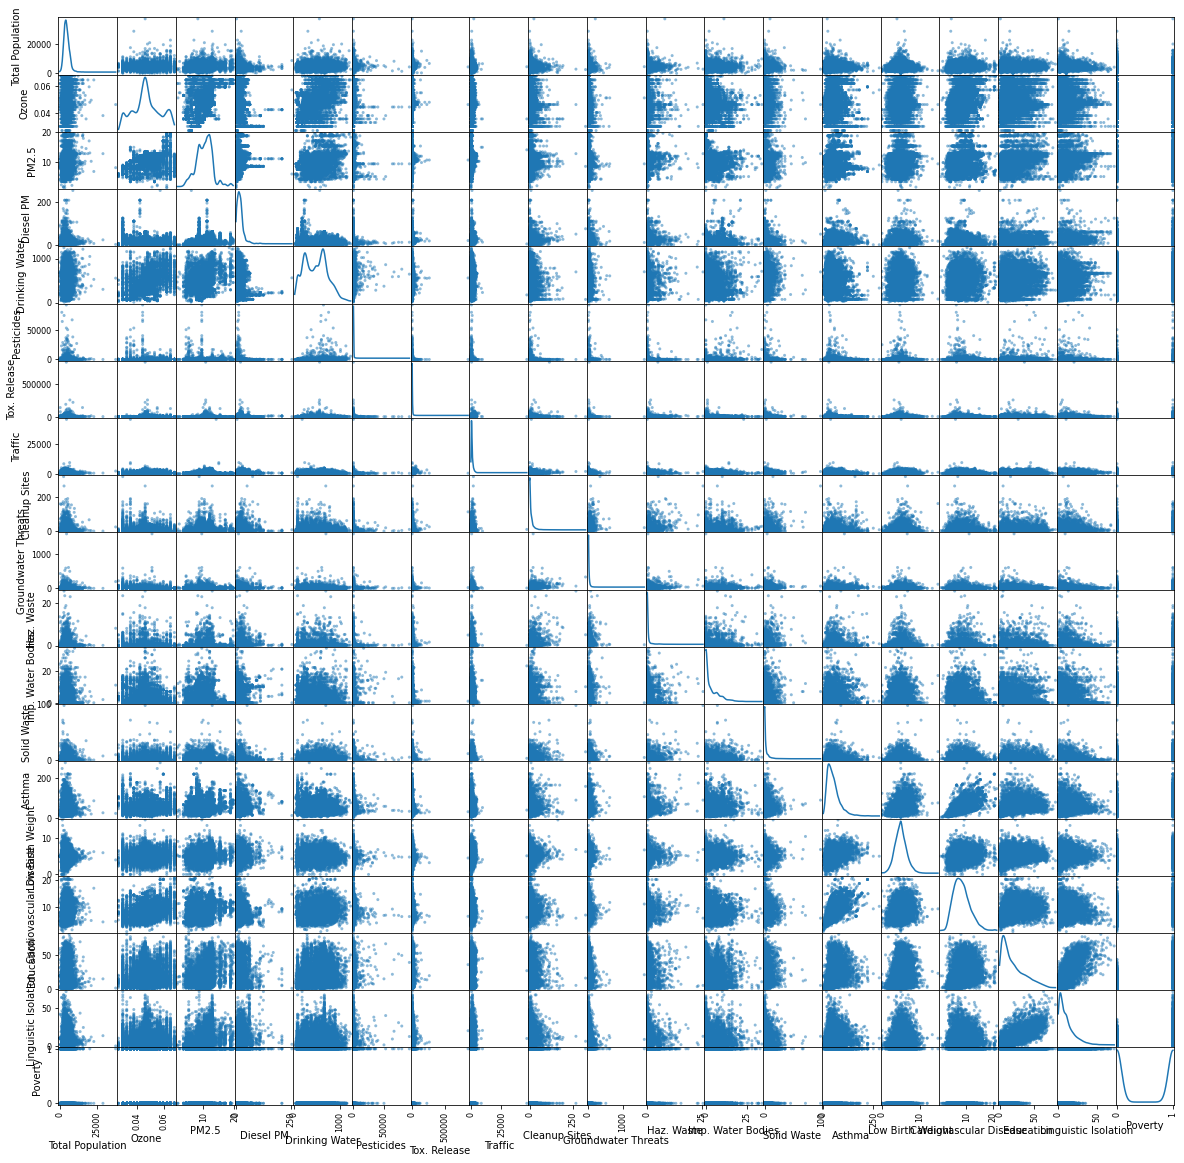

In [ ]:
pd.plotting.scatter_matrix(dfM, diagonal='kde', figsize=(20,20)) #kde means 'kernel density estimate'
plt.show()

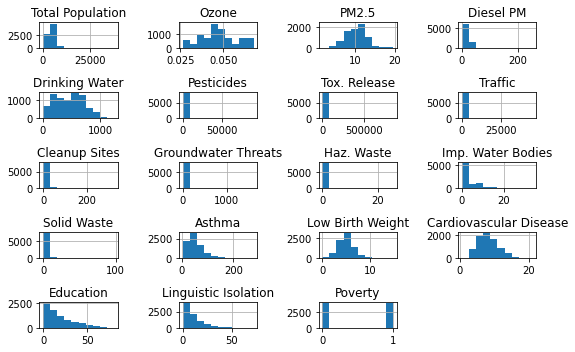

In [ ]:
dfM.hist(figsize=(8,5)) 
plt.tight_layout() 
plt.show()

##Data Splitting


In [ ]:
# split into X and Y
Y = dfM['Poverty']
X = dfM.drop(['Poverty'], axis=1)

print(X.shape)
print(Y.shape)

(7956, 18)
(7956,)


Lets check the distribution of target variable to check the distribution

In [ ]:

dfM.Poverty = dfM.Poverty.astype(int)
dfM['Poverty'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    3987
1    3969
Name: Poverty, dtype: int64

We can move ahead with this distribution

In [ ]:
print(X.shape)
print(Y.shape)

(7956, 18)
(7956,)


In [ ]:
# convert to numpy array
X = np.array(X)

In [ ]:

#Split the data into 90% training and 10% test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                               test_size=0.1,
                                               random_state=3003306)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(7160, 18) (796, 18) (7160,) (796,)


In [ ]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)  #Fits and transforms the Train data by calculating mean and standard deviation
X_test = sc.transform(X_test)

##Baseline Model Building (Without dropoff)


In [ ]:
#Model code (Building the model)
model=Sequential()
model.add(Dense(18,input_shape=(X.shape[1],),activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 4)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 558
Trainable params: 558
Non-trainable params: 0
_________________________________________________________________


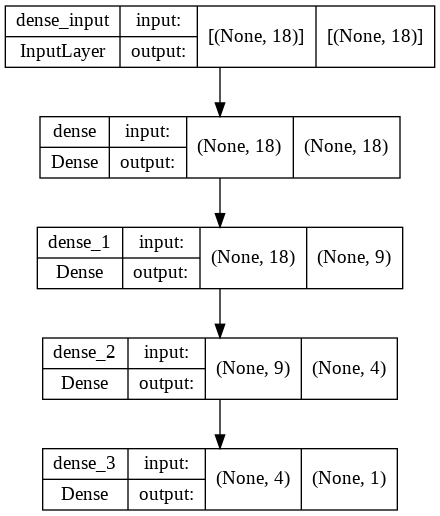

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
!pip install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_visualizer import visualizer 
visualizer(model, format='png', view=True)

In [ ]:
#compile model
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 100000 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=100000, 
                    batch_size=10,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
716/716 [==============================] - 3s 3ms/step - loss: 26.4542 - accuracy: 0.5244 - val_loss: 0.7706 - val_accuracy: 0.9234
Epoch 2/100000
716/716 [==============================] - 2s 2ms/step - loss: 5.7733 - accuracy: 0.5666 - val_loss: 3.2504 - val_accuracy: 0.3982
Epoch 3/100000
716/716 [==============================] - 2s 2ms/step - loss: 3.2300 - accuracy: 0.5585 - val_loss: 0.3960 - val_accuracy: 0.9410
Epoch 4/100000
716/716 [==============================] - 2s 2ms/step - loss: 2.1807 - accuracy: 0.6363 - val_loss: 0.4968 - val_accuracy: 0.8090
Epoch 5/100000
716/716 [==============================] - 2s 2ms/step - loss: 1.5108 - accuracy: 0.6469 - val_loss: 0.3604 - val_accuracy: 0.7940
Epoch 6/100000
716/716 [==============================] - 2s 2ms/step - loss: 1.1177 - accuracy: 0.6468 - val_loss: 0.4358 - val_accuracy: 0.7374
Epoch 7/100000
716/716 [==============================] - 2s 2ms/step - loss: 0.8087 - accuracy: 0.6478 - val_loss: 0.3890 

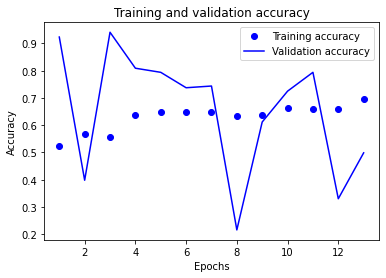

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

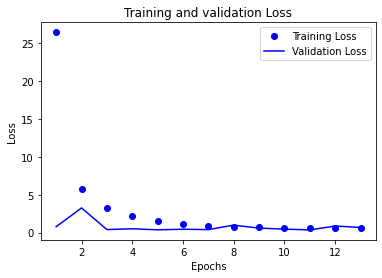

In [ ]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

##Baseline Model Evaluation

In [ ]:
# this is the max value - should correspond to
np.max(val_acc)

0.9409547448158264

In [ ]:
#Import confusion matrix related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# check model performance
preds = np.round(model.predict(X),0)

# confusion matrix
confusion_matrix(Y, preds) 

array([[3839,  148],
       [3298,  671]])

In [ ]:
print(classification_report(Y, preds))

              precision    recall  f1-score   support

           0       0.54      0.96      0.69      3987
           1       0.82      0.17      0.28      3969

    accuracy                           0.57      7956
   macro avg       0.68      0.57      0.49      7956
weighted avg       0.68      0.57      0.49      7956



##Model building 1
Activation - relu and sigmoid
Dense Layers - 3 , Dropoff=0.15
Patience-10 ,batchsize-10
Optimizer-rmsprop, Loss Function-binary_classifcation
Epochs - 10000

In [ ]:
# # resets names in the model summary
from keras import backend as K
K.clear_session()

In [ ]:
#Building the model
model=Sequential()
model.add(Dense(24,input_shape=(X.shape[1],),activation='relu'))
model.add(Dropout(0.15)) # specify a percentage between 0 and 0.5
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(8,activation='tanh'))
model.add(Dropout(0.15))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 24)                456       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                400       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                

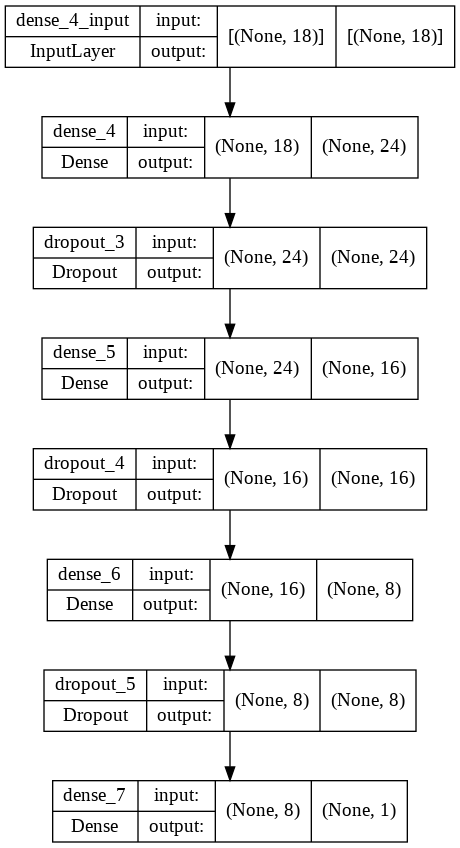

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
!pip install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_visualizer import visualizer 
visualizer(model, format='png', view=True)

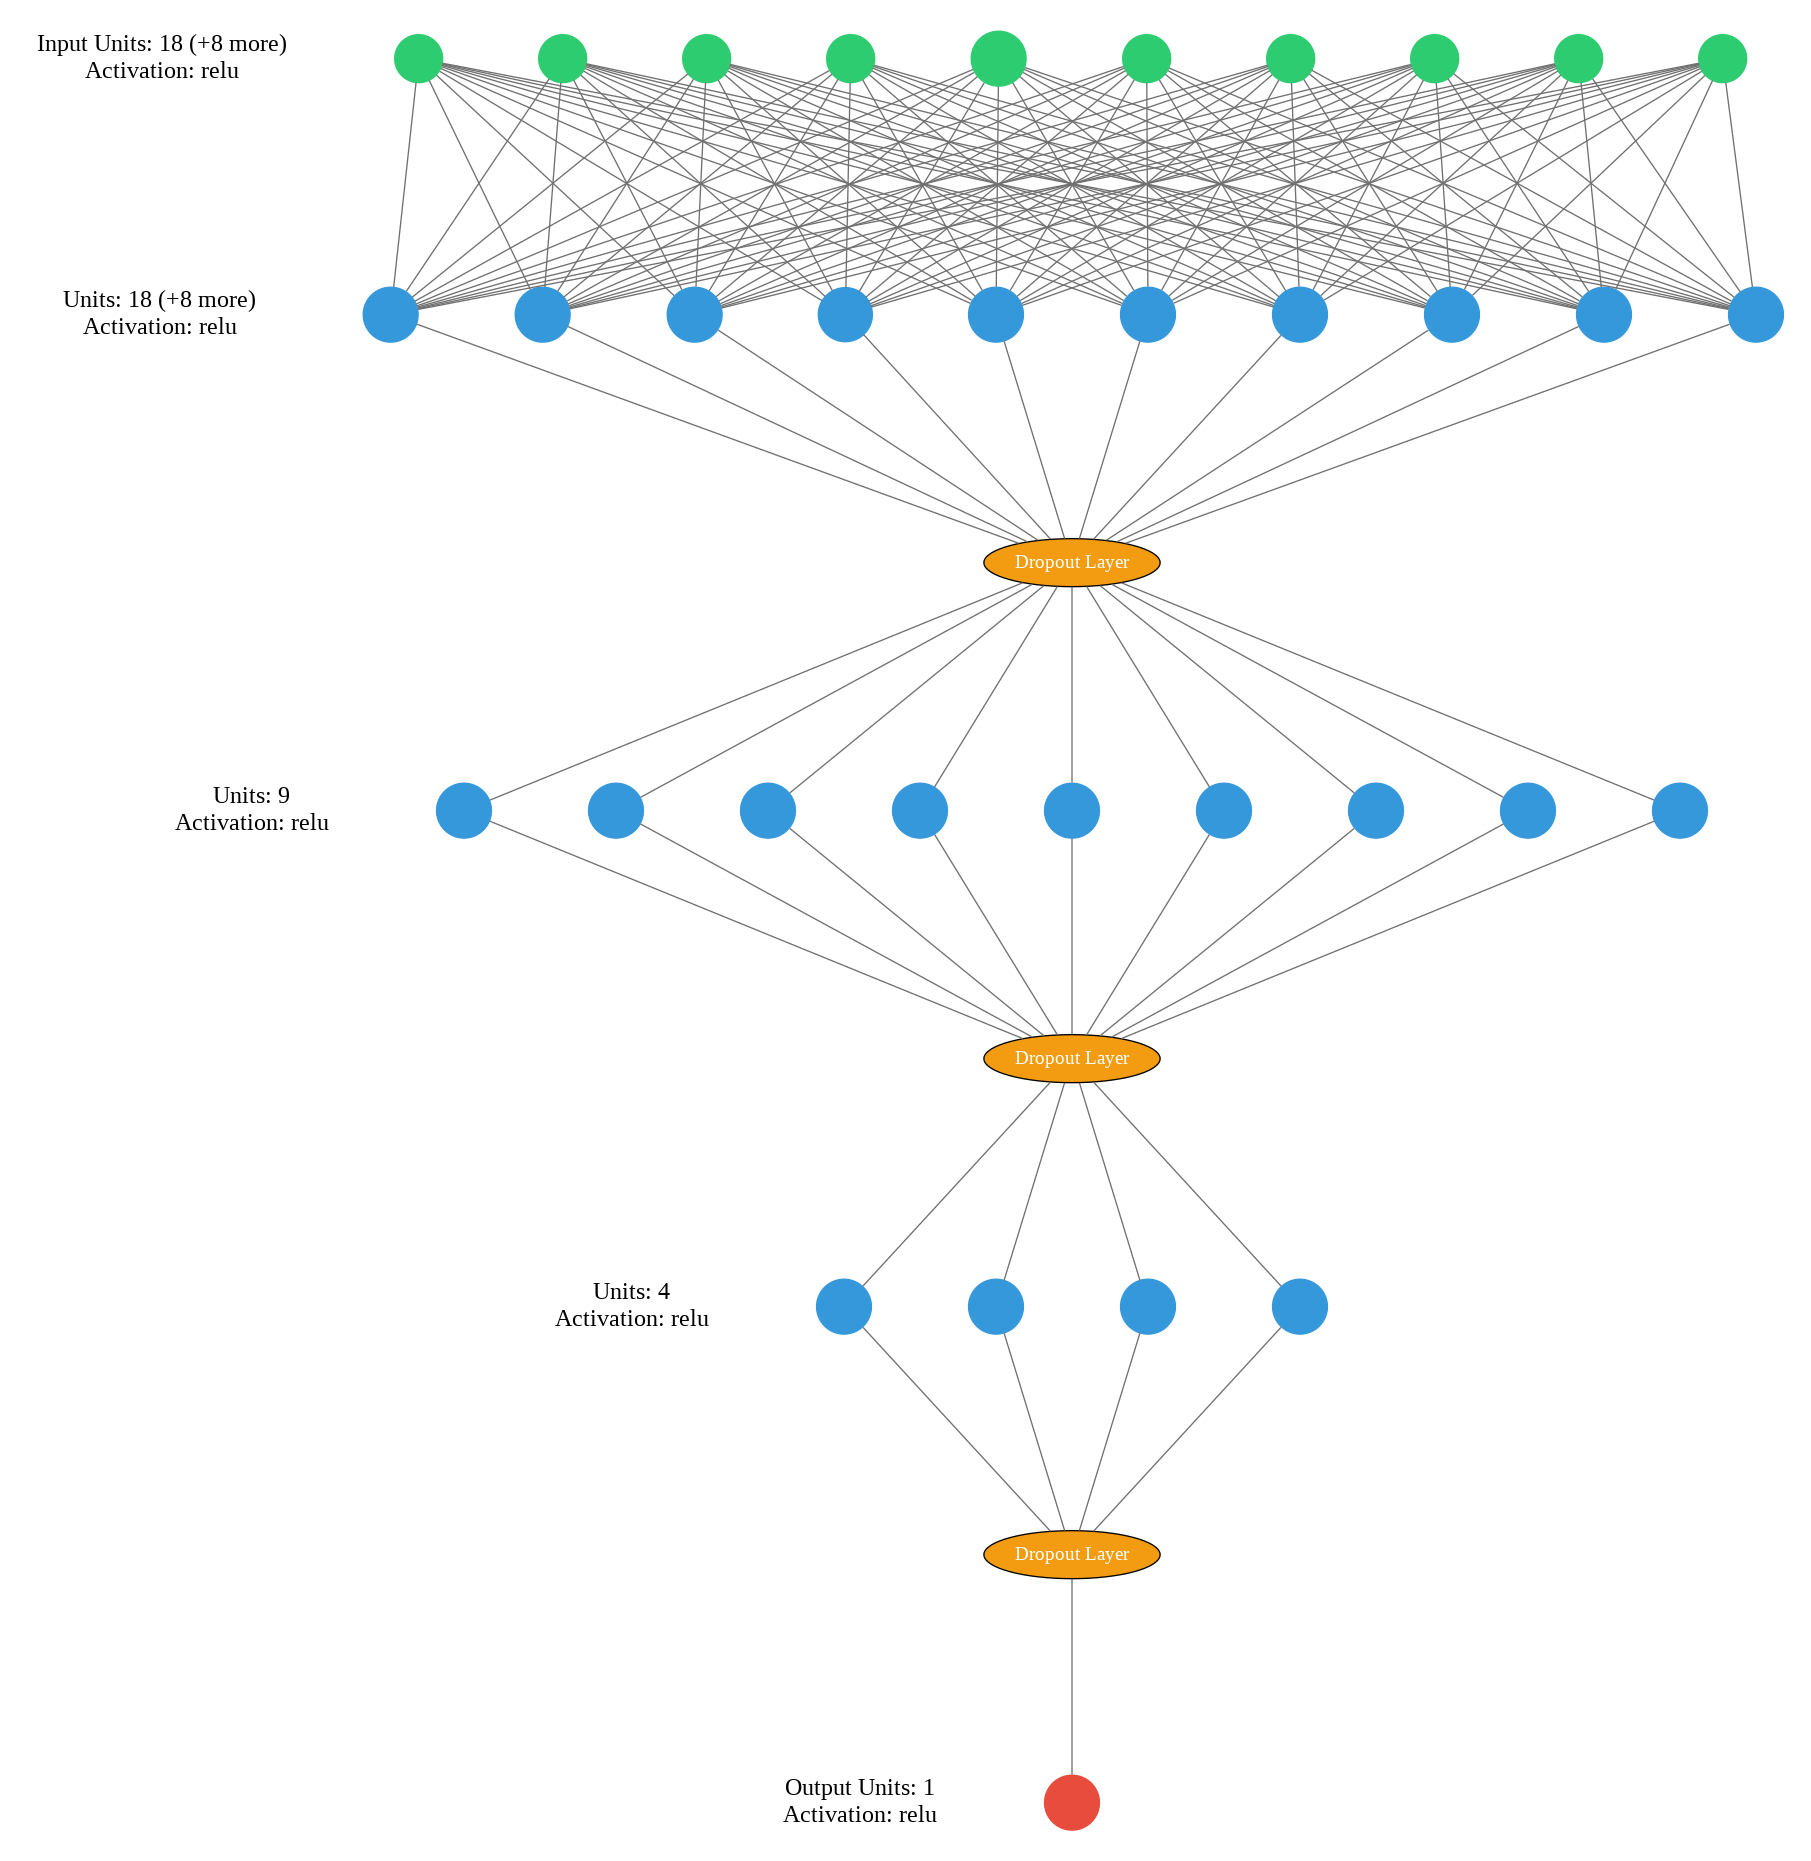

In [ ]:
# compile the model 
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 100000 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=24,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=100000, 
                    batch_size=15,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
478/478 [==============================] - 2s 2ms/step - loss: 0.8304 - accuracy: 0.5053 - val_loss: 0.8106 - val_accuracy: 0.0817
Epoch 2/100000
478/478 [==============================] - 1s 3ms/step - loss: 0.7340 - accuracy: 0.5253 - val_loss: 0.7321 - val_accuracy: 0.0917
Epoch 3/100000
478/478 [==============================] - 1s 2ms/step - loss: 0.7155 - accuracy: 0.5203 - val_loss: 0.8075 - val_accuracy: 0.0415
Epoch 4/100000
478/478 [==============================] - 2s 3ms/step - loss: 0.7015 - accuracy: 0.5250 - val_loss: 0.7864 - val_accuracy: 0.3053
Epoch 5/100000
478/478 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.5311 - val_loss: 0.7612 - val_accuracy: 0.0440
Epoch 6/100000
478/478 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5432 - val_loss: 0.7732 - val_accuracy: 0.0678
Epoch 7/100000
478/478 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5447 - val_loss: 0.7869 -

##Model Evaluation 1

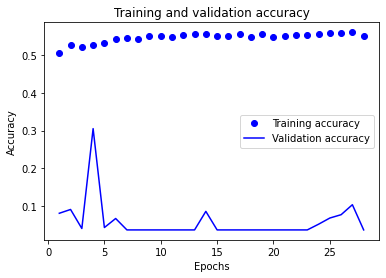

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

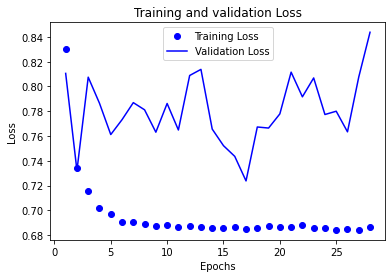

In [ ]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# this is the max value - should correspond to
# the HIGHEST train accuracy (go look at the verbose from the model fit)
np.max(val_acc)

0.30527639389038086

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# see how these are numbers between 0 and 1? prob of successes (survival)
model.predict(X)

array([[0.5950162 ],
       [0.5950162 ],
       [0.5950162 ],
       ...,
       [0.54351974],
       [0.6434492 ],
       [0.5229446 ]], dtype=float32)

In [ ]:
np.round(model.predict(X),0)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
# here is Y
Y

0       1
1       1
2       1
3       1
4       1
       ..
8028    1
8029    0
8030    0
8031    0
8032    0
Name: Poverty, Length: 7956, dtype: int64

In [ ]:
# see how the model did!
# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix
confusion_matrix(Y, preds) # order matters! (actual, predicted)

array([[1128, 2859],
       [ 819, 3150]])

In [ ]:
print(classification_report(Y, preds))

              precision    recall  f1-score   support

           0       0.58      0.28      0.38      3987
           1       0.52      0.79      0.63      3969

    accuracy                           0.54      7956
   macro avg       0.55      0.54      0.51      7956
weighted avg       0.55      0.54      0.51      7956



In [ ]:
# # resets names in the model summary
from keras import backend as K
K.clear_session()

##Model building 2
Activation - relu and sigmoid
Dense Layers - 4 , Dropoff=0.15
Patience-10 ,batchsize-10
Optimizer-rmsprop, Loss Function-binary_classifcation
Epochs - 10000



In [ ]:
#Model code (Building the model)
model=Sequential()
model.add(Dense(36,input_shape=(X.shape[1],),activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                684       
                                                                 
 dropout (Dropout)           (None, 36)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                888       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                400       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

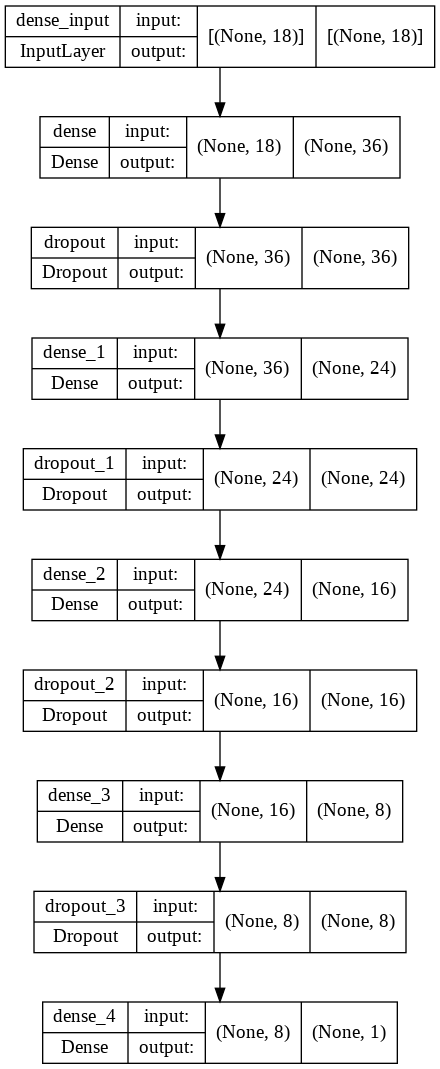

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
!pip install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_visualizer import visualizer 
visualizer(model, format='png', view=True)

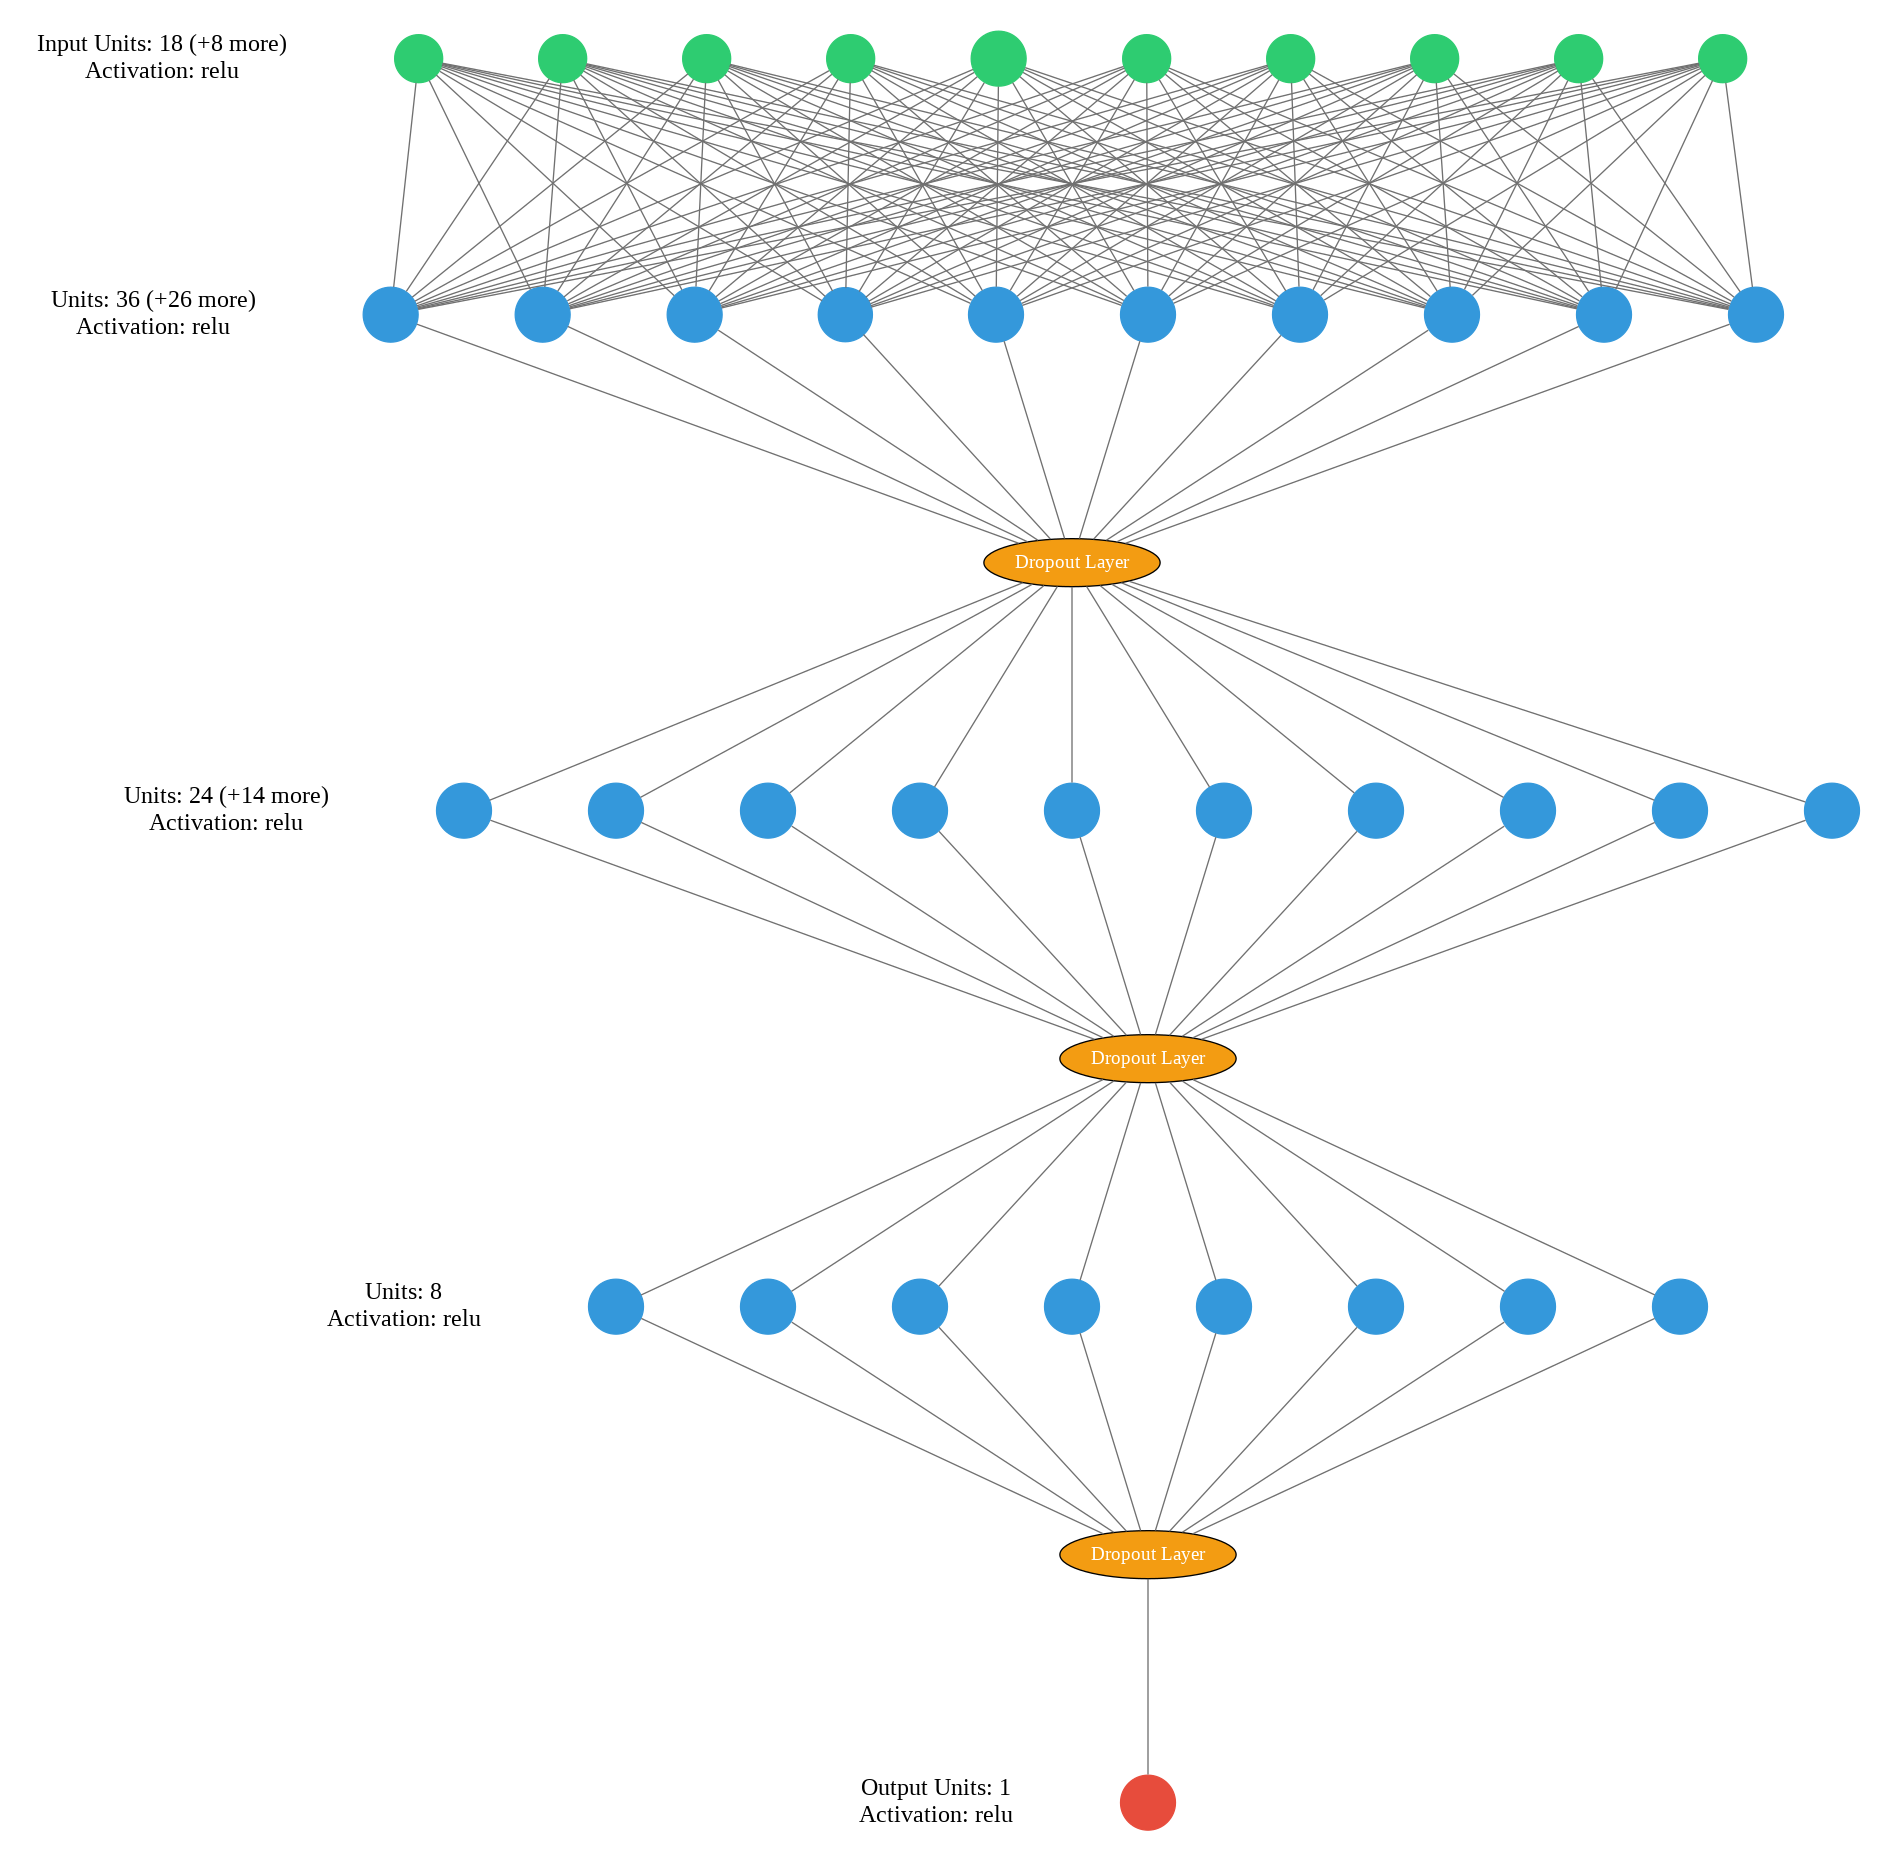

In [ ]:
# compile the model 
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 100000 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', #
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=100000, 
                    batch_size=10,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
716/716 [==============================] - 3s 2ms/step - loss: 35.1592 - accuracy: 0.5194 - val_loss: 0.8329 - val_accuracy: 0.0377
Epoch 2/100000
716/716 [==============================] - 2s 3ms/step - loss: 1.0395 - accuracy: 0.5446 - val_loss: 0.8284 - val_accuracy: 0.0377
Epoch 3/100000
716/716 [==============================] - 3s 4ms/step - loss: 0.8272 - accuracy: 0.5503 - val_loss: 0.8130 - val_accuracy: 0.0377
Epoch 4/100000
716/716 [==============================] - 3s 4ms/step - loss: 0.7715 - accuracy: 0.5493 - val_loss: 0.8037 - val_accuracy: 0.0377
Epoch 5/100000
716/716 [==============================] - 4s 5ms/step - loss: 0.7339 - accuracy: 0.5508 - val_loss: 0.7997 - val_accuracy: 0.0377
Epoch 6/100000
716/716 [==============================] - 5s 7ms/step - loss: 0.7056 - accuracy: 0.5527 - val_loss: 0.8020 - val_accuracy: 0.0377
Epoch 7/100000
716/716 [==============================] - 4s 6ms/step - loss: 0.7293 - accuracy: 0.5492 - val_loss: 0.7942 

##Model Evaluation 2

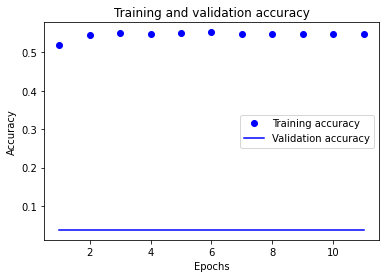

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

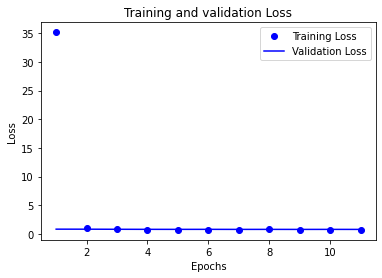

In [ ]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# this is the max value - should correspond to
# the HIGHEST train accuracy (go look at the verbose from the model fit)
np.max(val_acc)

0.03768844157457352

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# see how these are numbers between 0 and 1? prob of successes (survival)
model.predict(X)

array([[0.5322244],
       [0.5322244],
       [0.5322244],
       ...,
       [0.5286581],
       [0.5322244],
       [0.5289618]], dtype=float32)

In [ ]:
# see how the model did!
# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix
confusion_matrix(Y, preds) # order matters! (actual, predicted)

array([[   0, 3987],
       [   0, 3969]])

In [ ]:
print(classification_report(Y, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3987
           1       0.50      1.00      0.67      3969

    accuracy                           0.50      7956
   macro avg       0.25      0.50      0.33      7956
weighted avg       0.25      0.50      0.33      7956



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Findings

1-My baseline model was without drop off and 3 layers ,later I built several different models with increasing number of layers, changing batch size and other different parameters but unfortunately even after several iterations the model didnt learn well.

2- Without dropoff the model was working the best with max validation accuracy of 94%.

3- Rmsprop optimizer was still better than other optimizers.

4- My baseline neural network model worked better than any other model.

5- The scatterplot also indicates that other models are not learning well at all. There is no or very less overlap between validation and training curves. 


